In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [109]:
df = pd.read_csv('tn.movie_budgets.csv', index_col=0)
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [110]:
df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [111]:
df.duplicated().value_counts()

False    5782
dtype: int64

In [112]:
#Removing unwanted characters

def remove_unwanted(df, characters_to_remove):
    """Function to remove unwanted characters from the columns"""
    
    
    for col in df.columns:
        df[col] = df[col].apply(lambda x: ''.join([b for b in x if b not in characters_to_remove]))
        
    return df

In [113]:
#Applying the function to remove the characters

df = remove_unwanted(df, ['$', ','])
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,Dec 18 2009,Avatar,425000000,760507625,2776345279
2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,Jun 7 2019,Dark Phoenix,350000000,42762350,149762350
4,May 1 2015,Avengers: Age of Ultron,330600000,459005868,1403013963
5,Dec 15 2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
78,Dec 31 2018,Red 11,7000,0,0
79,Apr 2 1999,Following,6000,48482,240495
80,Jul 13 2005,Return to the Land of Wonders,5000,1338,1338


In [114]:
#Dropping the release_date column

df.drop('release_date', axis=1, inplace=True)
df

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000,760507625,2776345279
2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,Dark Phoenix,350000000,42762350,149762350
4,Avengers: Age of Ultron,330600000,459005868,1403013963
5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
78,Red 11,7000,0,0
79,Following,6000,48482,240495
80,Return to the Land of Wonders,5000,1338,1338


In [118]:
#Converting the production_budget, domestic_gross, and worldwide_gross columns to float

df[['production_budget', 'domestic_gross', 'worldwide_gross']] = df[['production_budget', 'domestic_gross', 'worldwide_gross']].astype(float)
df

,movie,production_budget,domestic_gross,worldwide_gross,Movie_ROI
id,,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09,5.53
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.55
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.57
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.24
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.15
...,...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00,-1.00
79,Following,6000.0,48482.0,2.404950e+05,39.08
80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-0.73


In [119]:
#Adding a new column to track returns from every movie

df['returns'] = df['worldwide_gross'] - df['production_budget']

In [120]:
#Adding a new column to track returns from every movie

df['Movie_ROI'] = round((df['worldwide_gross'] - df['production_budget']) / df['production_budget'], 2)
df

,movie,production_budget,domestic_gross,worldwide_gross,Movie_ROI,returns
id,,,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09,5.53,2.351345e+09
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.55,6.350639e+08
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.57,-2.002376e+08
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.24,1.072414e+09
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.15,9.997217e+08
...,...,...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00,-1.00,-7.000000e+03
79,Following,6000.0,48482.0,2.404950e+05,39.08,2.344950e+05
80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-0.73,-3.662000e+03


In [121]:
highest_grossing_films = df.sort_values('returns', ascending = False)
highest_grossing_films.head(10)

,movie,production_budget,domestic_gross,worldwide_gross,Movie_ROI,returns
id,,,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09,5.53,2.351345e+09
43,Titanic,200000000.0,659363944.0,2.208208e+09,10.04,2.008208e+09
7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,5.83,1.748134e+09
6,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,5.71,1.747311e+09
34,Jurassic World,215000000.0,652270625.0,1.648855e+09,6.67,1.433855e+09
67,Furious 7,190000000.0,353007020.0,1.518723e+09,6.99,1.328723e+09
27,The Avengers,225000000.0,623279547.0,1.517936e+09,5.75,1.292936e+09
61,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,9.73,1.216693e+09
42,Black Panther,200000000.0,700059566.0,1.348258e+09,5.74,1.148258e+09


In [122]:
grouping_movies = highest_grossing_films.set_index('movie')
grouped_movies = grouping_movies.head(10)

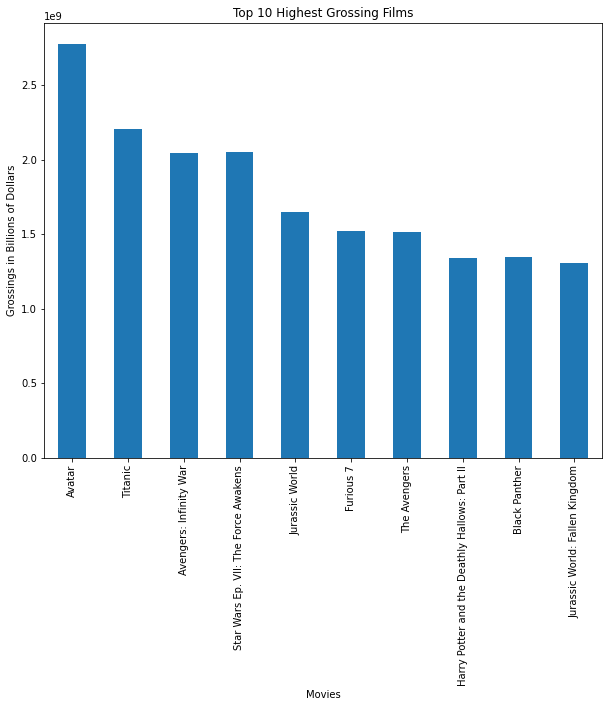

In [123]:
plt.figure(figsize = (10, 8))

grouped_movies['worldwide_gross'].plot(kind='bar')
plt.title('Top 10 Highest Grossing Films')
plt.xlabel('Movies')
plt.ylabel('Grossings in Billions of Dollars')
plt.show();

In [124]:
#Retrieving the top ten highest grossing films

top_10 = df.sort_values('Movie_ROI', ascending = False).head(15).iloc[1:]
top_10

,movie,production_budget,domestic_gross,worldwide_gross,Movie_ROI,returns
id,,,,,,
14,Mad Max,200000.0,8750000.0,99750000.0,497.75,99550000.0
93,Paranormal Activity,450000.0,107918810.0,194183034.0,430.52,193733034.0
80,The Gallows,100000.0,22764410.0,41656474.0,415.56,41556474.0
7,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.83,247700000.0
10,Super Size Me,65000.0,11529368.0,22233808.0,341.06,22168808.0
47,Bambi,858000.0,102797000.0,268000000.0,311.35,267142000.0
74,El Mariachi,7000.0,2040920.0,2041928.0,290.70,2034928.0
77,Night of the Living Dead,114000.0,12087064.0,30087064.0,262.92,29973064.0
11,Rocky,1000000.0,117235147.0,225000000.0,224.00,224000000.0


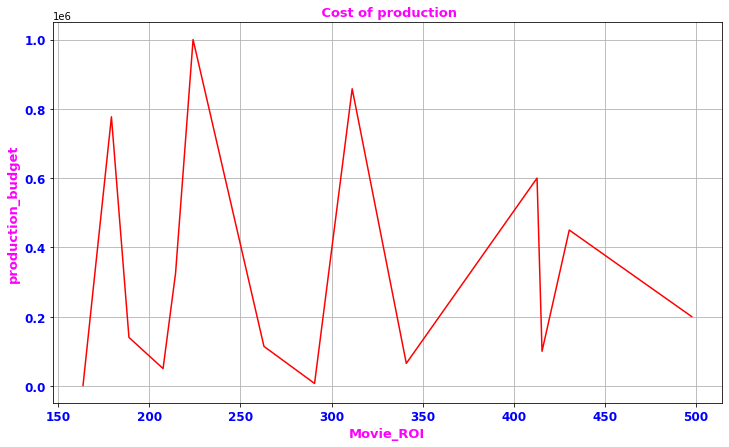

In [125]:
#Visualizing the top ten highest grossing films

plt.figure(figsize= (12, 7))

sns.lineplot(x='Movie_ROI',y='production_budget', data=top_10, color = 'red')

plt.xlabel('Movie_ROI',  fontsize = 13, fontweight = 'bold', color = 'magenta')
plt.ylabel('production_budget', fontsize = 13, fontweight = 'bold', color = 'magenta')
plt.title(' Cost of production',  fontsize = 13, fontweight = 'bold', color = 'magenta')
plt.xticks( fontsize = 12, fontweight = 'bold', color = 'blue')
plt.yticks( fontsize = 12, fontweight = 'bold', color = 'blue')
plt.grid();